# Test Excel

Suposiciones: Todos los productos dentro de un tipo de producto (product type)
generan el mismo margen bruto unitario en todos los países.

In [30]:
# LIBRERIAS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [83]:
# DATA
archivo = 'Altitude - DB Test Excel Feb24.xlsx'
df = pd.read_excel(archivo)

## Estadística Descriptiva

In [3]:
# Incluir en el dataset df una columna llamada "Total Price ($us)"
# Esta columna se calcula multiplicando la cantidad total de unidades vendidas por el precio unitario
df['Total Price ($us)'] = df['Total Units Sold'] * df['Unit Price ($us)']

# Incluir en el dataset df una columna llamada "Unit Cost ($us)"
# Esta columna se calcula dividiendo el costo total en dólares estadounidenses entre la cantidad total de unidades vendidas
df['Unit Cost ($us)'] = df['Total Cost ($us)'] / df['Total Units Sold']

In [84]:
# Utilizar el método 'info' para obtener una descripción concisa del dataframe
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Region            10001 non-null  object        
 1   Country           10001 non-null  object        
 2   Product Type      10001 non-null  object        
 3   Order Date        10001 non-null  datetime64[ns]
 4   Order ID          10001 non-null  int64         
 5   Ship Date         10001 non-null  datetime64[ns]
 6   Total Units Sold  10001 non-null  int64         
 7   Unit Price ($us)  10001 non-null  float64       
 8   Total Cost ($us)  10001 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(2), object(3)
memory usage: 703.3+ KB
None


In [85]:
# Utilizar el método 'describe' para obtener un resumen estadístico del dataframe
print(df.describe())

           Order ID  Total Units Sold  Unit Price ($us)  Total Cost ($us)
count  1.000100e+04      10001.000000      10001.000000      1.000100e+04
mean   5.498506e+08       5002.356264        268.141853      9.381720e+05
std    2.607791e+08       2873.537235        217.933232      1.145895e+06
min    1.000892e+08          2.000000          9.330000      3.087000e+01
25%    3.218126e+08       2530.000000        109.280000      1.647652e+05
50%    5.483657e+08       4961.000000        205.700000      4.814683e+05
75%    7.759573e+08       7472.000000        437.200000      1.183785e+06
max    9.999342e+08      10000.000000        668.270000      5.241726e+06


## Preguntas a responder

### 1. Qué región tiene las ventas más altas (en $us) y con cuánto?

In [6]:
# Agrupar el dataframe por 'Region' y calcular la suma de 'Total Price ($us)' para cada región
region_ventas_max = df.groupby('Region')['Total Price ($us)'].sum()

# Encontrar la región con las ventas más altas
region_maxima = region_ventas_max.idxmax()

# Obtener el valor máximo de ventas
ventas_maximas = region_ventas_max.max()

# Imprimir la suma de ventas para cada región
print(region_ventas_max)
print("")

# Imprimir la región con las ventas más altas y su total de ventas
print(f"La región con las ventas más altas es {region_maxima} con un total de {ventas_maximas} $us.")

Region
Asia                                 2.005306e+09
Australia and Oceania                1.049802e+09
Central America and the Caribbean    1.395530e+09
Europe                               3.481374e+09
Middle East and North Africa         1.715633e+09
North America                        3.353524e+08
Sub-Saharan Africa                   3.350556e+09
Name: Total Price ($us), dtype: float64

La región con las ventas más altas es Europe con un total de 3481373604.43 $us.


### 2. Qué país tiene la mayor cantidad de unidades de carne vendidas?

In [98]:
# Filtrar el dataframe para incluir solo las filas donde 'Product Type' es 'Meat'
pais_unidades_carne_max = df[df['Product Type'] == 'Meat'].groupby('Country')['Total Units Sold'].sum()

# Encontrar el país con la mayor cantidad de unidades de carne vendidas
pais_maximo = pais_unidades_carne_max.idxmax()

# Encontrar la cantidad máxima de unidades de carne vendidas
unidades_maximas = pais_unidades_carne_max.max()

# Imprimir el país con la mayor cantidad de unidades de carne vendidas junto con su total
print(f"El país con la mayor cantidad de unidades de carne vendidas es {pais_maximo} con un total de {unidades_maximas} unidades.")

El país con la mayor cantidad de unidades de carne vendidas es Sudan con un total de 56503 unidades.


### 3. Existe un dato inconsistente en la base de datos. Encuentra esta inconsistencia y límpiala. Cambia alguna de tus respuestas anteriores? Utiliza la tabla corregida en las siguientes preguntas de los niveles intermedio y avanzado. 

#### Calculo del dato inconsistente mediante el margen bruto unitario porcentual y utilizando el método del rango intercuartil (IQR)

In [8]:
# Calcular el margen bruto unitario sin agregarlo al dataframe
margen_bruto_unitario_per = ((df['Unit Price ($us)'] - df['Unit Cost ($us)']) / df['Unit Price ($us)']) * 100

# Calcular el primer (Q1) y tercer cuartil (Q3)
Q1 = margen_bruto_unitario_per.quantile(0.25)
Q3 = margen_bruto_unitario_per.quantile(0.75)

# Calcular el rango intercuartil (IQR)
IQR = Q3 - Q1

# Definir los límites para los outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Crear una máscara booleana para los outliers
mascara = (margen_bruto_unitario_per >= limite_inferior) & (margen_bruto_unitario_per <= limite_superior)

# Imprimir el dato inconsistente
print(f"Si calculamos el margen bruto unitario en $us, la cantidad de datos atípicos,  es de: {len(df[~mascara])}")

Si calculamos el margen bruto unitario en $us, la cantidad de datos atípicos,  es de: 873


#### Cálculo del dato inconsistente mediante el margen bruto unitario en $us y utilizando el método del rango intercuartil (IQR)

In [9]:
# Calcular el margen bruto unitario
margen_bruto_unitario = df['Unit Price ($us)'] - df['Unit Cost ($us)']
margen_bruto_unitario_Sus = margen_bruto_unitario
# Calcular el primer (Q1) y tercer cuartil (Q3)
Q1 = margen_bruto_unitario.quantile(0.25)
Q3 = margen_bruto_unitario.quantile(0.75)

# Calcular el rango intercuartil (IQR)
IQR = Q3 - Q1

# Definir los límites para los outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Crear una máscara booleana para los outliers
mascara = (margen_bruto_unitario >= limite_inferior) & (margen_bruto_unitario <= limite_superior)

# Imprimir el dato inconsistente
print("Los datos incosistentes podría ser: ")
print("")
print(df[~mascara])

# Aplicar la máscara al dataframe para mantener solo las filas que no son outliers
df = df[mascara]

Los datos incosistentes podría ser: 

       Region Country Product Type Order Date   Order ID  Ship Date  \
10000  Europe   Spain    Baby Food 2013-01-17  337123875 2013-02-03   

       Total Units Sold  Unit Price ($us)  Total Cost ($us)  \
10000                 6            255.28             30.87   

       Total Price ($us)  Unit Cost ($us)  
10000            1531.68            5.145  


{'whiskers': [<matplotlib.lines.Line2D at 0x7fa58d757610>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa58d756550>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa58da6a110>],
 'medians': [<matplotlib.lines.Line2D at 0x7fa58d757750>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fa58d757550>],
 'means': []}

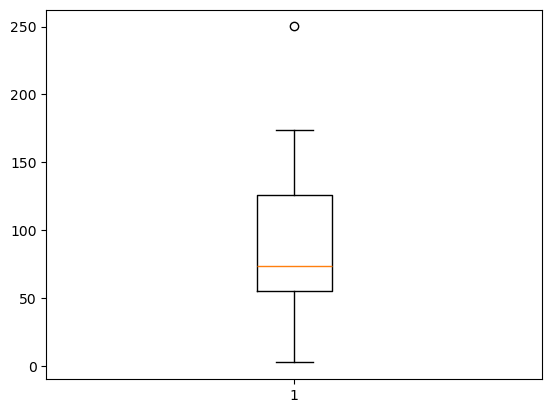

In [10]:
# Para comprobar el calculo que se hizo con IQR. Generar un diagrama de caja (boxplot) para la variable margen_bruto_unitario $us y observar datos atípicos
plt.boxplot(margen_bruto_unitario)

#### ¿Cambia alguna de tus respuestas anteriores?

In [11]:
# Agrupar el dataframe por la columna 'Region' y calcula la suma de 'Total Price ($us)' para cada región
# Luego, encuentra la región con la suma más alta de 'Total Price ($us)'
region_con_ventas_mas_altas = df.groupby('Region')['Total Price ($us)'].sum().idxmax()

#Imprimir 
print(f"La región con las ventas más altas (en $us) es {region_con_ventas_mas_altas}.")

La región con las ventas más altas (en $us) es Europe.


In [12]:
# Filtrar el dataframe para incluir solo las filas donde 'Product Type' es 'Meat'
# Luego, agrupa el dataframe filtrado por la columna 'Country' y calcula la suma de 'Total Units Sold' para cada país
# Finalmente, encuentra el país con la suma más alta de 'Total Units Sold'
pais_con_mas_unidades_de_carne_vendidas = df[df['Product Type'] == 'Meat'].groupby('Country')['Total Units Sold'].sum().idxmax()

# Imprimir 
print(f"El país con la mayor cantidad de unidades de carne vendidas es {pais_con_mas_unidades_de_carne_vendidas}.")

El país con la mayor cantidad de unidades de carne vendidas es Sudan.


### 4. ¿Cuál es el tipo de producto con mayor margen bruto porcentual?

In [13]:
# Agrupar por tipo de producto y sumar 'Total Price ($us)' y 'Total Cost ($us)'
grupo_producto = df.groupby('Product Type').agg({'Total Price ($us)': 'sum', 'Total Cost ($us)': 'sum'})

# Calcular el margen bruto porcentual para cada tipo de producto
margen_bruto_porcentual = (grupo_producto['Total Price ($us)'] - grupo_producto['Total Cost ($us)']) / grupo_producto['Total Price ($us)'] * 100

# Cambiar nombre de columna
margen_bruto_porcentual = margen_bruto_porcentual.rename("Margen Bruto Porcentual")

# Encontrar el tipo de producto con el mayor margen bruto porcentual
producto_con_mayor_margen = margen_bruto_porcentual.idxmax()

# Imprimir
print(margen_bruto_porcentual)
print("")
print(f"El tipo de producto con el mayor margen bruto porcentual es {producto_con_mayor_margen}.")

Product Type
Baby Food          37.550924
Beverages          33.003161
Cereal             43.067574
Clothes            67.203514
Cosmetics          39.768984
Fruits             25.830654
Household          24.799856
Meat               13.558036
Office Supplies    19.386987
Personal Care      30.661936
Snacks             36.138419
Vegetables         40.977541
Name: Margen Bruto Porcentual, dtype: float64

El tipo de producto con el mayor margen bruto porcentual es Clothes.


### 5. Grafica un pareto de margen bruto por país e indica cuántos países cubren el 80% del margen generado a nivel mundial

#### Para el margen bruto en $us

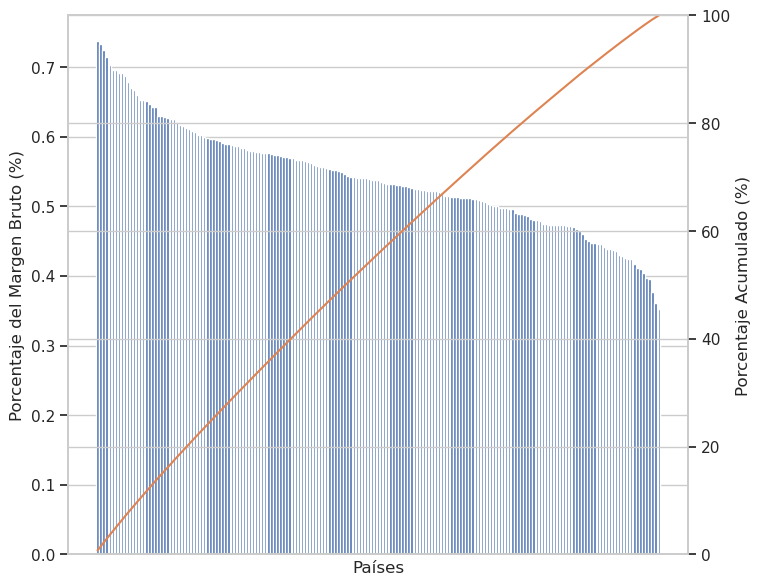

137 países representan el 80% del margen bruto generado a nivel mundial.


In [49]:
# Calcular el margen bruto total 
df['Margen bruto total ($us)'] = df['Total Price ($us)'] - df['Total Cost ($us)']

# Calcular el margen bruto total por país
margen_pais = df.groupby('Country')['Margen bruto total ($us)'].sum().sort_values(ascending=False)

# Calcular el porcentaje de cada país
porcentaje_pais = margen_pais / margen_pais.sum() * 100

# Calcular el porcentaje acumulado
porcentaje_acumulado = porcentaje_pais.cumsum()

# Crear un nuevo DataFrame con los datos de porcentaje y porcentaje acumulado
pareto_margen_bruto = pd.DataFrame({
    'Country': porcentaje_pais.index,
    'Porcentaje_Pais': porcentaje_pais.values,
    'Porcentaje_Acumulado': porcentaje_acumulado.values
})

# Establecer el estilo del gráfico
sns.set_theme(style="whitegrid")

# Crear el gráfico de barras para el margen bruto por país
fig, ax1 = plt.subplots(figsize=(8, 7))
ax1.bar(pareto_margen_bruto_per['Country'], pareto_margen_bruto_per['Porcentaje_Pais'], color='C0')

# Crear el gráfico de línea para el porcentaje acumulado
ax2 = ax1.twinx()
ax2.plot(pareto_margen_bruto_per['Country'], pareto_margen_bruto_per['Porcentaje_Acumulado'], color='C1', ms=5)

# Ajustar los límites del eje y derecho
ax2.set_ylim(bottom=0, top=100)

# Añadir las etiquetas de los ejes
ax1.set_xlabel('Países')
ax1.set_ylabel('Porcentaje del Margen Bruto (%)')
ax2.set_ylabel('Porcentaje Acumulado (%)')

# Hacer que las etiquetas del eje x sean más pequeñas y verticales
plt.xticks([])

# Guardar imagen
plt.savefig('image/cinco1.png')

# Mostrar el gráfico
plt.show()

# Calcular cuántos países representan el 80% del margen bruto
num_paises = (pareto_margen_bruto['Porcentaje_Acumulado'] <= 80).sum()
print(f'{num_paises} países representan el 80% del margen bruto generado a nivel mundial.')

#### Para el margen bruto Porcentual

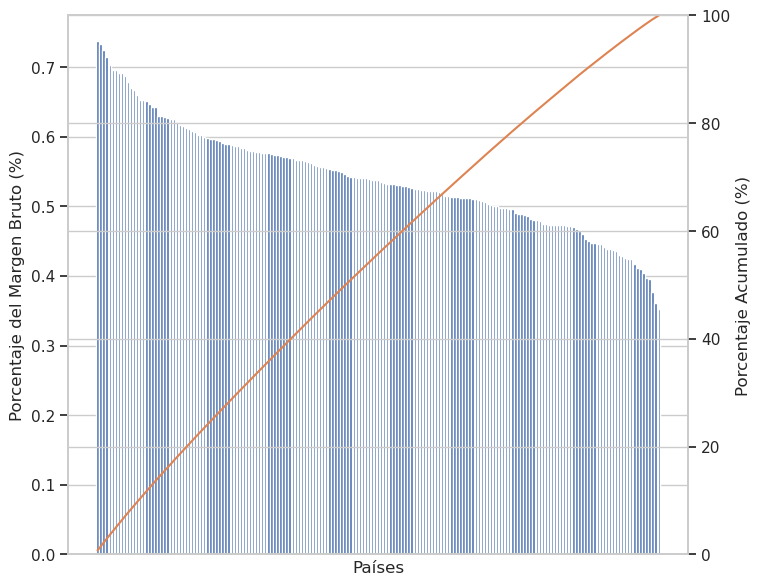

140 países representan el 80% del margen bruto generado a nivel mundial.


In [48]:
# Calcular el margen bruto total 
df['Margen bruto total (per)'] = ((df['Total Price ($us)'] - df['Total Cost ($us)']) / df['Total Price ($us)']) * 100

# Calcular el margen bruto total por país
margen_pais = df.groupby('Country')['Margen bruto total (per)'].sum().sort_values(ascending=False)

# Calcular el porcentaje de cada país
porcentaje_pais = margen_pais / margen_pais.sum() * 100

# Calcular el porcentaje acumulado
porcentaje_acumulado = porcentaje_pais.cumsum()

# Crear un nuevo DataFrame con los datos de porcentaje y porcentaje acumulado
pareto_margen_bruto_per = pd.DataFrame({
    'Country': porcentaje_pais.index,
    'Porcentaje_Pais': porcentaje_pais.values,
    'Porcentaje_Acumulado': porcentaje_acumulado.values
})

# Establecer el estilo del gráfico
sns.set_theme(style="whitegrid")

# Crear el gráfico de barras para el margen bruto por país
fig, ax1 = plt.subplots(figsize=(8, 7))
ax1.bar(pareto_margen_bruto_per['Country'], pareto_margen_bruto_per['Porcentaje_Pais'], color='C0')

# Crear el gráfico de línea para el porcentaje acumulado
ax2 = ax1.twinx()
ax2.plot(pareto_margen_bruto_per['Country'], pareto_margen_bruto_per['Porcentaje_Acumulado'], color='C1', ms=5)

# Ajustar los límites del eje y derecho
ax2.set_ylim(bottom=0, top=100)

# Añadir las etiquetas de los ejes
ax1.set_xlabel('Países')
ax1.set_ylabel('Porcentaje del Margen Bruto (%)')
ax2.set_ylabel('Porcentaje Acumulado (%)')

# Hacer que las etiquetas del eje x sean más pequeñas y verticales
plt.xticks([])

# Guardar imagen
plt.savefig('image/cinco2.png')

# Mostrar el gráfico
plt.show()

# Calcular cuántos países representan el 80% del margen bruto
num_paises = (pareto_margen_bruto_per['Porcentaje_Acumulado'] <= 80).sum()
print(f'{num_paises} países representan el 80% del margen bruto generado a nivel mundial.')

### 6. Calcula el tiempo promedio (en días) por país que toma en ser enviada una orden desde la fecha en que se registra la orden (order date vs ship date)

#### a. Cuál es el país con menor tiempo promedio de envío y cuántos días son?

In [52]:
# Calcular el número de días que toma enviar cada orden
df.loc[:, 'Días para enviar'] = (df['Ship Date'] - df['Order Date']).dt.days

# Calcular el tiempo promedio de envío por país y redondear al entero más cercano
tiempo_promedio_envio = df.groupby('Country')['Días para enviar'].mean().round().astype(int)

# Crear un DataFrame llamado tiempo_envio
tiempo_envio = pd.DataFrame(tiempo_promedio_envio)

# Encontrar el país con el menor tiempo promedio de envío
pais_menor_tiempo = tiempo_envio['Días para enviar'].idxmin()

# Encontrar el menor tiempo promedio de envío
menor_tiempo = tiempo_envio['Días para enviar'].min()

# Imprimir
print(f'El país con el menor tiempo promedio de envío es {pais_menor_tiempo} y el tiempo promedio de envío es de {menor_tiempo} días.')

El país con el menor tiempo promedio de envío es Yemen y el tiempo promedio de envío es de 19 días.


#### b. Grafica un histograma de estos tiempos promedio por país, utilizando un rango de contenedores (bins) de 1 día. En qué rango se encuentra la mayor cantidad de países?

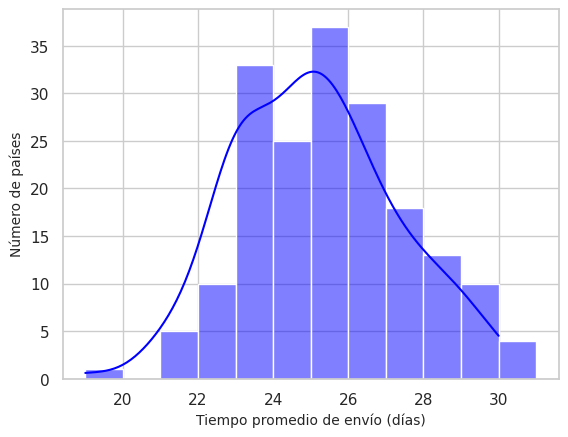

El rango de días con la mayor cantidad de países es 25.


In [68]:
# Establecer el estilo del gráfico
sns.set_theme(style="whitegrid")

# Crear el histograma con seaborn
sns.histplot(data=tiempo_envio, 
             x='Días para enviar', 
             bins=range(int(tiempo_envio['Días para enviar'].min()), int(tiempo_envio['Días para enviar'].max()) + 2), 
             kde=True, 
             color='blue')

# Añadir las etiquetas de los ejes y el título
plt.xlabel('Tiempo promedio de envío (días)', fontsize=10)
plt.ylabel('Número de países', fontsize=10)

# Guardar imagen
plt.savefig('image/seis.png')

# Mostrar el gráfico
plt.show()

# Calcular el rango de días con la mayor cantidad de países
dias_con_mas_paises = tiempo_envio['Días para enviar'].value_counts().idxmax()

# Imprimir respuesta
print(f'El rango de días con la mayor cantidad de países es {dias_con_mas_paises}.')

### 7. Calcula la tasa de crecimiento anual compuesta de ventas a nivel mundial, para el mayor rango de años consecutivos con ventas en todos los meses del año.

In [72]:
# Crear una columna para el año y el mes
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month

# Agrupar por año y contar los meses únicos
df_grupo = df.groupby('Year')['Month'].nunique()

# Encontrar los años donde hubo ventas en todos los meses
df_todos_años = df_grupo[df_grupo == 12]

#imprimir una tabla que identifica el rango de años consecutivos
print(df_grupo)

Year
2010    12
2011    12
2012    12
2013    12
2014    12
2015    12
2016    12
2017     7
Name: Month, dtype: int64


In [73]:
# Sumar las ventas anuales mundiales
ventas_anuales = df.groupby(df['Order Date'].dt.year)['Total Price ($us)'].sum()

# Obtener la suma de 'Total Price ($us)' para el año 2010 y el año 2016
ventas_2010 = ventas_anuales.loc[2010]
ventas_2016 = ventas_anuales.loc[2016]

print(f'La suma total de "Total Price ($us)" para el año 2010 fue de: {ventas_2010}')
print(f'La suma total de "Total Price ($us)" para el año 2016 fue de: {ventas_2016}')

# Calcular la TCAC
V_inicial = ventas_anuales.loc[2010]
V_final = ventas_anuales.loc[2016]
n = 2016 - 2010

TCAC = ((V_final / V_inicial)**(1/n) - 1) * 100

print(f'La Tasa de Crecimiento Anual Compuesta (TCAC) entre el año 2010 y el año 2016 fue de: {round(TCAC,2)} %')

La suma total de "Total Price ($us)" para el año 2010 es: 1586297835.53
La suma total de "Total Price ($us)" para el año 2016 es: 1708702924.77
La Tasa de Crecimiento Anual Compuesta (TCAC) entre el año 2010 y el año 2016 es: 1.25 %


### 8. Para órdenes realizadas (order date) en diciembre del 2015, responde a las siguientes preguntas utilizando una tabla dinámica:

In [81]:
# Filtramos las órdenes realizadas en diciembre del 2015
df_dec_2015 = df[(df['Order Date'].dt.year == 2015) & (df['Order Date'].dt.month == 12)].copy()

# Creamos una nueva columna para el día de la semana
df_dec_2015.loc[:, 'Day of Week'] = df_dec_2015['Ship Date'].dt.day_name()

# Creamos la tabla dinámica
tabla_dinamica = pd.pivot_table(df_dec_2015, index='Day of Week', aggfunc='size')

# Cambiar nombre de columna
tabla_dinamica = tabla_dinamica.rename("Número de ordenes")

# Imprimir tabla
print(tabla_dinamica)

Day of Week
Friday       10
Monday       27
Saturday     21
Sunday       13
Thursday     19
Tuesday      12
Wednesday    23
Name: Número de ordenes, dtype: int64


#### a. Identifica en qué día de la semana (lunes-domingo) se dan la mayor cantidad de envíos

In [76]:
# Identifica en qué día de la semana (lunes-domingo) se dan la mayor cantidad de envíos
max_ship_day = pivot_table.idxmax()
print(f"El día de la semana con la mayor cantidad de envíos es: {max_ship_day}")

El día de la semana con la mayor cantidad de envíos es: Monday


#### b. Identifica en qué día de la semana (lunes-domingo) se dan la menor cantidad de envíos

In [77]:
# Identifica en qué día de la semana (lunes-domingo) se dan la menor cantidad de envíos
min_ship_day = pivot_table.idxmin()
print(f"El día de la semana con la menor cantidad de envíos es: {min_ship_day}")

El día de la semana con la menor cantidad de envíos es: Friday


## Exportar datos y tablas

In [97]:
# Crear un escritor de pandas Excel
writer = pd.ExcelWriter('datos_tablas.xlsx')

# Escribir cada dataframe en una hoja de Excel diferente
region_ventas_max.to_excel(writer, sheet_name='1. Region Ventas Max')
pais_unidades_carne_max.to_excel(writer, sheet_name='2. Pais Unidades Carne Max')
#margen_bruto_unitario_Sus.to_excel(writer, sheet_name='3. Margen Bruto Unitario $us')
margen_bruto_porcentual.to_excel(writer, sheet_name='4. Margen Bruto Tipo Producto %')
pareto_margen_bruto.to_excel(writer, sheet_name='5. Pareto Margen Bruto ($us)', index=False)
tiempo_envio.to_excel(writer, sheet_name='6. Tiempo Envio')
tabla_dinamica.to_excel(writer, sheet_name='8. Tabla Dinamica')

# Cerrar el escritor de pandas Excel
writer.close()